In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from multiprocessing import Pool

# import pandas as pd
# import seaborn as sns
# sns.set(style="white")

In [2]:
dat = np.load('noconst/snapshot_150.npz')

(6.198883056640625e-06,
 0.9999946355819702,
 3.965070573030971e-05,
 0.9999900460243225)

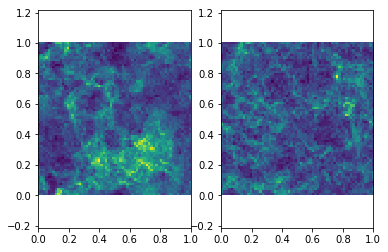

In [3]:
plt.subplot(1,2,1)
filt = dat['grainsize'] < 0.01
a = plt.hist2d(dat['x'][filt], dat['z'][filt], 64)
plt.axis('equal')

plt.subplot(1,2,2)
filt = dat['grainsize'] > 0.1
a = plt.hist2d(dat['x'][filt], dat['z'][filt], 64)
plt.axis('equal')

(array([106032., 104160., 107160., 106056., 106152., 102784., 107840.,
        108312., 107856., 104856.]),
 array([-2.8238862, -2.6238925, -2.4238987, -2.223905 , -2.0239112,
        -1.8239176, -1.6239239, -1.4239302, -1.2239364, -1.0239427,
        -0.823949 ], dtype=float32),
 <a list of 10 Patch objects>)

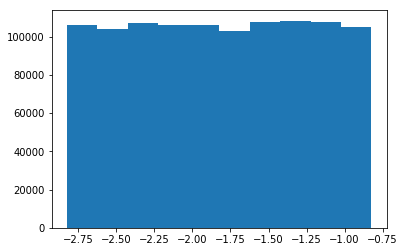

In [4]:
lg10size = np.log10(dat['grainsize'])
size_bins = np.linspace(lg10size.min(), lg10size.max(), 128)
plt.hist(np.log10(dat['grainsize']))

0
7920


C:\Users\h\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


16
8496
32
7992
48
8904
64
7992
80
8448
96
8088
112
9264


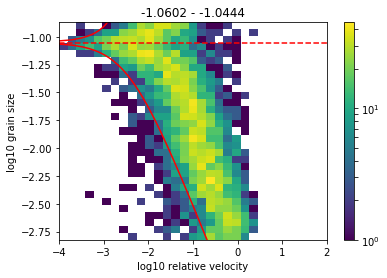

In [13]:
R = 0.01

for ii in range(len(size_bins)-1)[::16]:
    print(ii)
    
    ids = np.arange(len(dat['x']))[(lg10size > size_bins[ii]) & (lg10size <= size_bins[ii+1])]
    
    print(len(ids))

    q1 = []
    q2 = []

    for id in ids[np.random.permutation(len(ids))][:500]:
        xc = dat['x'][id]
        yc = dat['y'][id]
        zc = dat['z'][id]

        vxc = dat['vx'][id]
        vyc = dat['vy'][id]
        vzc = dat['vz'][id]
       
        filt = ((xc - dat['x'])**2 < R**2) & \
               ((yc - dat['y'])**2 < R**2) & \
               ((zc - dat['z'])**2 < R**2)

        vrel = (dat['vx'][filt]-vxc)**2 + \
               (dat['vy'][filt]-vyc)**2 + \
               (dat['vz'][filt]-vzc)**2

        q1.append(vrel)
        q2.append(np.log10(dat['grainsize'][filt]))

    q1 = np.concatenate(q1)
    q2 = np.concatenate(q2)
    
    plt.clf()
    t = plt.hist2d(np.log10(q1), q2, 
                   bins = [np.linspace(-4,2,32), size_bins[::4]], 
                   norm=mpl.colors.LogNorm()),
    #               vmax=40,vmin=1)
    cbin = (size_bins[ii] + size_bins[ii+1]) / 2.
    plt.plot(np.log10(np.abs(1./10**cbin - 1./10**size_bins))-3.5, 
             size_bins, '-r')

    plt.plot([-4,2], [cbin, cbin], '--r')
    plt.colorbar()
    plt.title("%0.4f - %0.4f"%(size_bins[ii], size_bins[ii+1]))
    plt.ylabel("log10 grain size")
    plt.xlabel("log10 relative velocity")

    plt.savefig("noconst/%05d_hist.png"%ii)
    


In [6]:
q1 = np.concatenate(q1)
q2 = np.concatenate(q2)

ValueError: zero-dimensional arrays cannot be concatenated

C:\Users\h\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,'log10 relative velocity')

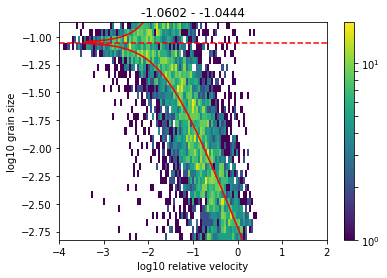

In [16]:

plt.clf()
t = plt.hist2d(np.log10(q1), q2, bins = [np.linspace(-4,2,128), size_bins[::4]], norm=mpl.colors.LogNorm())

cbin = (size_bins[ii] + size_bins[ii+1]) / 2.
plt.plot([-4,2], [cbin, cbin], '--r')

plt.plot(np.log10(np.abs(1./10**cbin - 1./10**size_bins))-2.7, size_bins, '-r')

plt.colorbar()
plt.title("%0.4f - %0.4f"%(size_bins[ii], size_bins[ii+1]))
plt.ylabel("log10 grain size")
plt.xlabel("log10 relative velocity")

# plt.savefig("noconst/%05d_hist.png"%ii)

C:\Users\h\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,'log10 relative velocity')

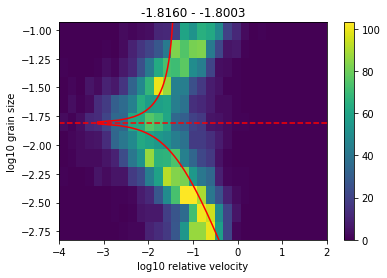

In [27]:

plt.clf()
t = plt.hist2d(np.log10(q1), 
               q2, 
               bins = [np.linspace(-4,2,32), size_bins[::10]], 
              )#norm=mpl.colors.LogNorm())

cbin = (size_bins[ii] + size_bins[ii+1]) / 2.
plt.plot([-4,2], [cbin, cbin], '--r')

plt.plot(np.log10(np.abs(1./10**cbin - 1./10**size_bins)/50)-1.5, 
         size_bins, '-r')

plt.colorbar()
plt.title("%0.4f - %0.4f"%(size_bins[ii], size_bins[ii+1]))
plt.ylabel("log10 grain size")
plt.xlabel("log10 relative velocity")

# plt.savefig("noconst/%05d_hist.png"%ii)